In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imresize
from utils import tohdf, instance_norm
import h5py
%matplotlib inline

plt.style.use('ggplot')
from datetime import datetime

from model import CycleGAN

%load_ext autoreload
%autoreload 2

In [2]:
img_dim = (256,256,3)
#tohdf('C:/Users/DanielTan/Desktop/summer2winter_yosemite/trainA/','trainA',img_dim,'D:/Research Files/CyleGAN/')
#tohdf('C:/Users/DanielTan/Desktop/summer2winter_yosemite/trainB/','trainB',img_dim,'D:/Research Files/CyleGAN/')

In [3]:
with h5py.File(''.join(['D:/Research Files/CyleGAN/trainA.h5']), 'r') as hf:
    dataA = hf['trainA'].value
with h5py.File(''.join(['D:/Research Files/CyleGAN/trainB.h5']), 'r') as hf:
    dataB = hf['trainB'].value
num_train = dataA.shape[0]
dataA = (dataA / 255.0 - 0.5)*2
dataB = (dataB / 255.0 - 0.5)*2

In [4]:
hyperparams = {
        'img_dim': img_dim,
        'batch_size' : 1,
        'num_examples' : num_train,
        'num_epochs' : 200,
        'learning_rate' : 2e-4,
        'weight_stdev' : 0.02,
        'n_res_blocks' : 9,
        'pool_size' : 50,
        'normalizer' : instance_norm,
        'lambda_A' : 10.0,
        'lambda_B' : 10.0,
    }
LOG_DIR = "log"
METAGRAPH_DIR = "out"
PLOTS_DIR = "png"

In [5]:
model = CycleGAN(dataA,dataB,hyperparams,img_dim)

Epoch: 199
1.74946 0.0944231 1.90005 0.0522831


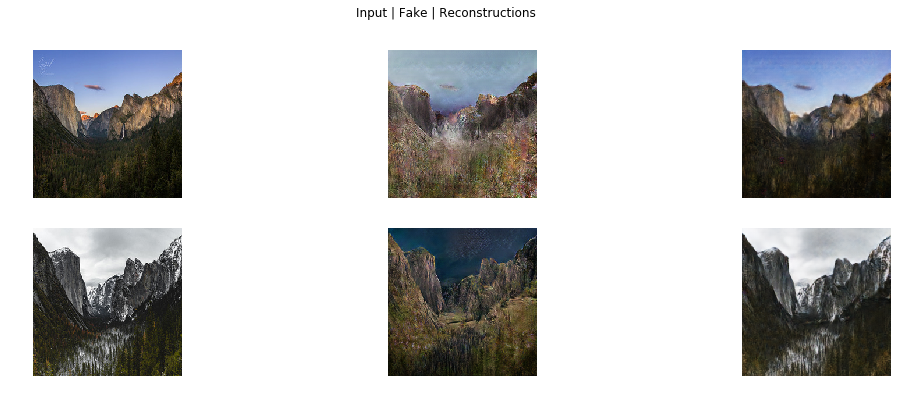

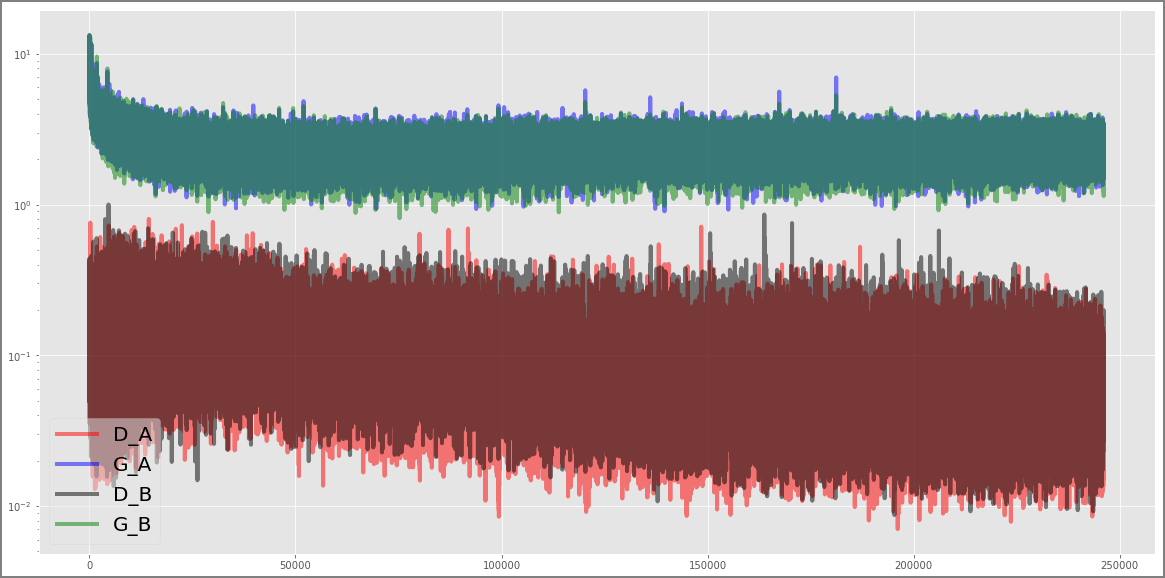

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1231/1231 [07:44<00:00,  4.65it/s]


In [6]:
#continue training from a saved session
model.train()